In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [2]:
# train, test, lookup
train_data = pd.read_csv('../input/facial-keypoints-detection/training.zip')
test_data = pd.read_csv('../input/facial-keypoints-detection/test.zip')
lookup = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

In [4]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [5]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [6]:
train_data.fillna(method='ffill', inplace=True)

In [8]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
train_data.shape

(7049, 31)

In [12]:
imag = []
for i in range(0, 7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [13]:
image_list = np.array(imag, dtype='float')
x_train = image_list.reshape(-1, 96, 96, 1)

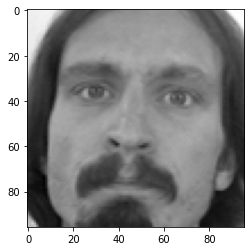

In [14]:
plt.imshow(x_train[0].reshape(96,96), cmap='gray')

In [15]:
training = train_data.drop('Image', axis = 1)

y_train = []

for i in range(0, 7049):
    y = training.iloc[i, :]
    y_train.append(y)
    
y_train = np.array(y_train, dtype='float')

In [16]:
# DNN
dnn = Sequential()


In [ ]:
# CNN
cnn = Sequential()

# feature extraction

cnn.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

cnn.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
cnn.add(LeakyReLU(alpha = 0.1))
cnn.add(BatchNormalization())

# classifier
